In [1]:
import os
import random

captcha_images_folder = "captcha_images"
captchas = [os.path.join(captcha_images_folder, f) for f in os.listdir(captcha_images_folder)]

In [2]:
print(len(captchas))

4676


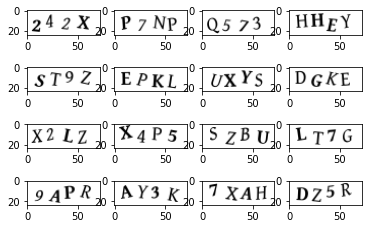

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

_, ax = plt.subplots(4, 4)
for i in range(16):
    img = mpimg.imread(captchas[random.randint(1,4676)])
    ax[i // 4, i % 4].imshow(img, cmap="gray")
# imgplot = plt.imshow(img)
plt.show()

In [5]:
def get_CAPTCHA_label(captcha_image_file):
    """Get the CAPTCHA text from the file name."""
    filename = os.path.basename(captcha_image_file)
    label = filename.split(".")[0]
#     print(label)
    return label

In [8]:
import cv2
def read_CAPTCHA_image(captcha_image_file):
    """Read CAPTCHA image into numpy array using OpenCv."""
    return cv2.imread(captcha_image_file)

In [9]:
def lets_see_it(image):
    """Displays the image."""
    cv2.imshow("window name", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [10]:
def grayscale_CAPTCHA_image(captcha_image):
    "Grayscales CAPTCHA image."""
    return cv2.cvtColor(captcha_image, cv2.COLOR_BGR2GRAY)

In [13]:
def threshold_CAPTCHA_image(captcha_image_grayscaled):
    """Thresholds CAPTCHA image."""
#     return cv2.threshold(captcha_image_grayscaled, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    return cv2.threshold(
        captcha_image_grayscaled, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
    )[1]

In [20]:
import numpy as np
def dilate_characters(binary_image):
    """slightly expands the characters."""
    kernel = np.ones((2,2), np.uint8) 
    return cv2.dilate(binary_image, kernel,iterations = 1)

In [22]:
def find_CAPTCHA_contours(captcha_image_thresholded):
    """Compute the contours of characters in the CAPTCHA image."""
    return cv2.findContours(captcha_image_thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
#     contours, hierarchy = cv2.findContours(captcha_image_thresholded, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2:]
#     contours, hierarchy = cv2.findContours(captcha_image_thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
#     return contours

In [24]:
def compute_bounding_rectangles(contours):
    """Computes the bounding rectangles of the contours."""
    return list(map(cv2.boundingRect,contours))

In [28]:
def show_bounding_rectangles(rectangles, image):
    """Shows the bounding rectangles of contours on the image."""
    for rect in rectangles:
        x,y,w,h = rect
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    lets_see_it(image)

In [31]:
def split_fat_rectangles(rectangles):
    """Splits fat rectangles into two rectangles."""
    letter_bounding_rectangles = []
    for rectangle in rectangles:
        (x, y, w, h) = rectangle
        if w / h > 1.25:
            half_width = int(w / 2)
            letter_bounding_rectangles.append((x, y, half_width, h))
            letter_bounding_rectangles.append((x + half_width, y, half_width, h))
        else:
            letter_bounding_rectangles.append(rectangle)
    return letter_bounding_rectangles

In [33]:
def get_character_images(rectangles, image):
    """Extracts the characters defined by bounding rectangles."""
    char_images = []
    for rect in rectangles:
            x, y, w, h = rect
            char_image = image[y - 1 : y + h + 1, x - 1 : x + w + 1]
            char_images.append(char_image)
    return char_images

In [34]:
def sort_bounding_rectangles(rects): 
    """Sorts bounding rectangles by x coordinate."""
    return(sorted(rects, key = lambda x: float(x[0]))) 

In [35]:
captcha_processing_output_folder = "extracted_character_images"
character_counts = {}
for captcha_image_file in captchas:
    captcha_label = get_CAPTCHA_label(captcha_image_file)

#     print(captcha_label)
    captcha_image = read_CAPTCHA_image(captcha_image_file)
#     print(captcha_image.shape)
    captcha_image_grayscaled = grayscale_CAPTCHA_image(captcha_image)
#     print(captcha_image_grayscaled.shape)
    captcha_image_thresholded = threshold_CAPTCHA_image(captcha_image_grayscaled)
#     print(captcha_image_thresholded.shape)
#     lets_see_it(captcha_image_thresholded)
    captcha_image_dilated = dilate_characters(captcha_image_thresholded)
#     lets_see_it(captcha_image_dilated)
    captcha_image_contours = find_CAPTCHA_contours(captcha_image_dilated)
#     lets_see_it(captcha_image_contours)
#     print(captcha_image_contours)
#     print(2)
#     lets_see_it(cv2.drawContours(captcha_image,captcha_image_contours,-1,(0,255,0),3))
    character_bounding_rectangles = split_fat_rectangles(compute_bounding_rectangles(captcha_image_contours))
    character_bounding_rectangles = sort_bounding_rectangles(character_bounding_rectangles)
    character_images = get_character_images(character_bounding_rectangles, captcha_image)
    for char_image, current_char in zip(character_images, captcha_label):
        if (len(character_images) == 4):
            save_dir = os.path.join(captcha_processing_output_folder, current_char)
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            character_count = character_counts.get(current_char, 0)
            image_save_path = os.path.join(save_dir, str(character_count) + ".png")
            cv2.imwrite(image_save_path, char_image)
            character_counts[current_char] = character_count + 1

In [11]:

img = read_CAPTCHA_image(captchas[random.randint(1,1456)])
lets_see_it(img)


In [6]:
 captcha_label = get_CAPTCHA_label(captchas[0])

In [7]:
captcha_label

'22LA'

In [12]:
img_gray= grayscale_CAPTCHA_image(img)
lets_see_it(img_gray)


In [19]:
img_threshold = threshold_CAPTCHA_image(img_gray)
lets_see_it(img_threshold)


In [21]:
captcha_image_dilated = dilate_characters(img_threshold)
lets_see_it(captcha_image_dilated)

In [26]:
captcha_image_contours = find_CAPTCHA_contours(captcha_image_dilated)
lets_see_it(cv2.drawContours(img,captcha_image_contours,-1,(0,255,0),3))

In [29]:
rectangles = compute_bounding_rectangles(captcha_image_contours)
show_bounding_rectangles(rectangles,img)

In [43]:
character_bounding_rectangles = split_fat_rectangles(compute_bounding_rectangles(captcha_image_contours))
show_bounding_rectangles(character_bounding_rectangles,img)